In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import re

import h5py
from tqdm import tqdm

In [ ]:
df_A = pd.read_csv('A_nodes.csv')
df_B = pd.read_csv('B_nodes.csv')
df_C = pd.read_csv('C_nodes.csv')

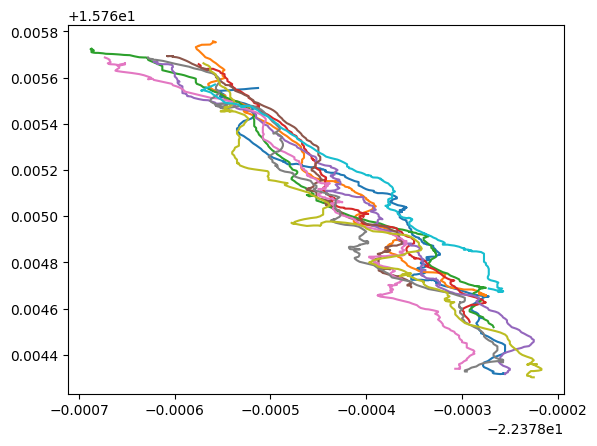

In [42]:
root = '../data/ColMotion-Species-Time-Data/'
traj_root = os.path.join(root, 'trajectories_eg')
traj_regex = r'traj_eg_(.*?)\.csv'
traj_data_paths = list(map(lambda x: os.path.join(traj_root, x), os.listdir(traj_root)))
traj_data_names = list(map(lambda x: re.search(traj_regex, x).group(1), traj_data_paths))

# lat lon time (maybe utc) id
# posx posy id time (not sure probably not utc)
df = pd.read_csv(traj_data_paths[0])
df

# fish in rectangular tank for 10 mins
# pigeons in free flight sampled with 0.2s sampling freq for 30 sec
# goats sampled every second for 5-6 hrs over 10 days
# baboons sampled every second for 5-6 hrs over 40 days

# periods of uninterrupted collective motion (high polarization) were extracted

# should we exclude birds as they are 3d?
# what about fish? they are semi 3d and are confined to a tank

for i in df.id.unique():
    plt.plot(df[df.id == i].lat, df[df.id == i].lon)
    

In [19]:

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# Load the RData file
robjects.r['load']('../data/doi_10-2/loc_data.RData')

# Access the data loaded into the R environment
# Replace 'name_of_the_dataframe_in_RData' with your actual data frame name in R
r_dataframe = robjects.r['loc_data']

# Convert R DataFrame to Pandas DataFrame
with localconverter(robjects.default_converter + pandas2ri.converter):
    df = robjects.conversion.rpy2py(r_dataframe)

df.event.nunique()

# for event in df.event.unique():
#     sdf = df[df.event == event]
#     for i in sdf.id.unique():
#         plt.plot(sdf[sdf.id == i].lat, sdf[sdf.id == i].lon)
#     plt.show()

21

I have worked with the Vicsek model now in a few of my courses and am intrigued by its capabilities every time.  For me, this model is a quintessential example of the beauty of physics: with simple rules leading to complex behavior.  At the simplest level, the model almost resembles an Ising model with mobile spins - as the particles seek to align themselves with their neighbors to reduce the global potential.  Just like the Ising model, when the strength of this interaction is small, the bulk behaves 'thermally' and is dominated by randomness (the noise component of the motion).  However, when the interaction strength increases, the system spontaneously orders as the particles align themselves.  This gives rise to two ordering domains: one random, one ordered.  The paper covers a very interesting, and new for me, extension of the model to include long range hydrodynamic interactions.  Here, a surprising result can be seen where there are two ordered domains and one disordered domain.  When the hydrodynamic interaction is small, the system is ordered into the typical 'Vicsek bands'.  When the interaction is intermediate, the system becomes disordered.  However, when the interaction is large, the system becomes ordered again, but in a different way.  Here, the particles form high density, high order 'blobs' as they seem to be jammed together by the disordered surroundings which may exert a net inwards pressure on the 'blobs'.